# Classification algorithms

***

## Random Forest implementation using sklearn 

source: [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html)

__Note about the data__: we will be using the famous iris data set which contains 4 variables measuring various parts of iris flowers (of 3 species) aas well as the species name. 


### Preliminar: load packages 


In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

### Loading the data 

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)


df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Creating the training and testing data 

In [4]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


In [5]:
train, test = df[df['is_train']==True], df[df['is_train']==False]

### Preprocessing the data

In [6]:
# Create a list of the feature column's names
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y, _ = pd.factorize(train['species'])

In [8]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


### Training the random forest classifier

In [9]:
clf = RandomForestClassifier(n_jobs = 2 )

# Training the classifier
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Applying to the data

In [10]:
preds = iris.target_names[clf.predict(test[features])]

In [11]:
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['predicted'])

predicted,setosa,versicolor,virginica
actual,,,
setosa,5,0,0
versicolor,0,11,0
virginica,0,2,12


### View feature importance 

In [12]:
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.16992592921521485),
 ('sepal width (cm)', 0.019510194239802908),
 ('petal length (cm)', 0.18115102228639413),
 ('petal width (cm)', 0.62941285425858806)]

***

## K- Means

### Preliminar : load packages 

In [13]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the data 

In [14]:
iris = load_iris()


# converting to a pandas DF for ease of use 
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

### Exploratory visualization of the data 

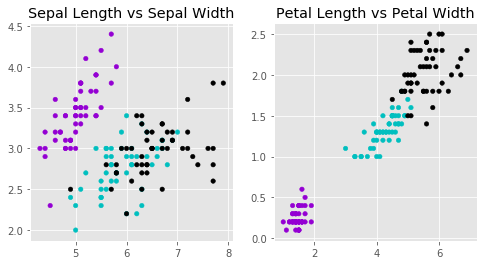

In [15]:
# creating a plot of the data first
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), sharey =False)
colors = np.array(['darkviolet', 'c', 'black'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
ax1.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s = 20)
ax1.set_title('Sepal Length vs Sepal Width')

ax2.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']], s = 20)
ax2.set_title('Petal Length vs Petal Width');

### Create a model object consiting of 3 clusters 

In [16]:
model = KMeans(n_clusters = 3)

### Apllying the model on the data

In [17]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
# model.labels_ contains the array of cluster ids
print (model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Visualise the output of the model

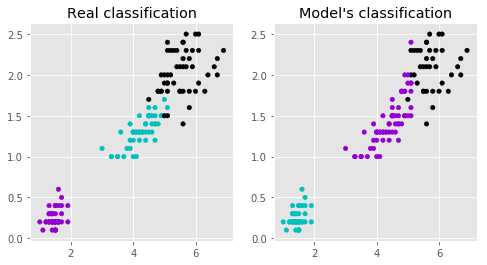

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), sharey =False)

predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)


# Plot the classifications that we saw earlier between Petal Length and Petal Width

ax1.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=20)
ax1.set_title('Real classification')
 
# Plot the classifications according to the model
ax2.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=20)
ax2.set_title("Model's classification");

In [20]:
import time
print('This notebook was last run on: ' + time.strftime('%d/%m/%y') + ' at: ' + time.strftime('%H:%M:%S'))

This notebook was last run on: 17/01/18 at: 11:06:28
